In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
train = pd.read_csv('/content/drive/My Drive/Titanic/train.csv')
test = pd.read_csv('/content/drive/My Drive/Titanic/test.csv')

In [36]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
488,489,0,3,"Somerton, Mr. Francis William",male,30.0,0,0,A.5. 18509,8.0500,NaN,S
687,688,0,3,"Dakic, Mr. Branko",male,19.0,0,0,349228,10.1708,NaN,S
155,156,0,1,"Williams, Mr. Charles Duane",male,51.0,0,1,PC 17597,61.3792,NaN,C
303,304,1,2,"Keane, Miss. Nora A",female,NaN,0,0,226593,12.3500,E101,Q


Correlação das variáveis com um mapa de calor:

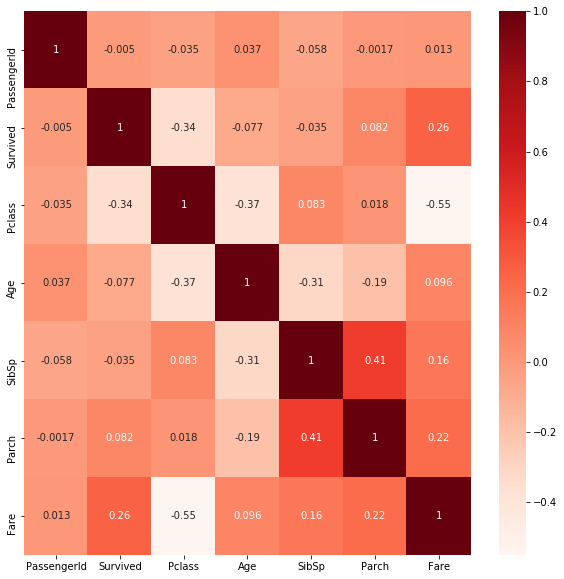

In [37]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(), annot=True, cmap="Reds")

Gráfico para mostrar a relação de sobreviventes com a coluna sexo:

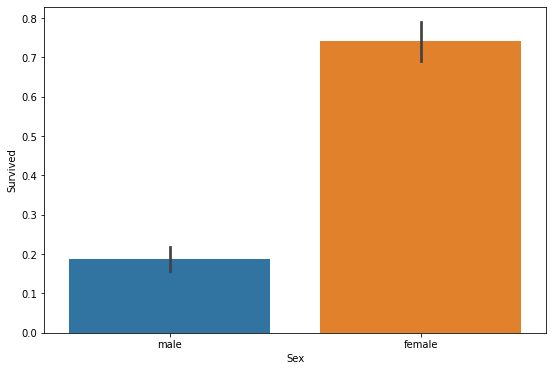

In [38]:
plt.figure(figsize=(9,6))
sns.barplot(x='Sex',y='Survived',data=train)

Gráfico para mostrar a relação entre a classe e os sobreviventes:

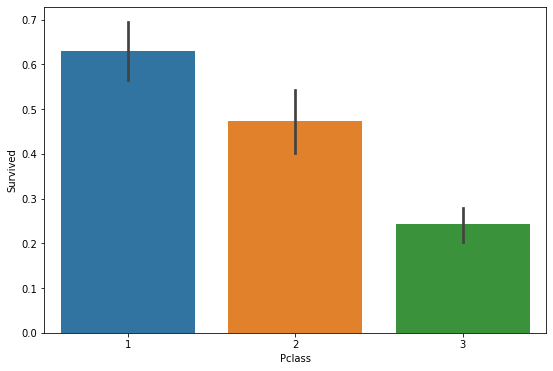

In [39]:
plt.figure(figsize=(9,6))
sns.barplot(x='Pclass', y='Survived', data=train)

In [0]:
#Removendo dados irrelevantes
train.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [41]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [0]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [0]:
train_numerico = train.drop(['Sex','Embarked'], axis=1)
test_numerico = test.drop(['Sex','Embarked'], axis=1)

In [44]:
imputer.fit(train_numerico)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [0]:
train_no_null = imputer.transform(train_numerico)

In [0]:
imputer.fit(test_numerico)
test_no_null = imputer.transform(test_numerico)

In [0]:
train_tr = pd.DataFrame(train_no_null, columns=train_numerico.columns)
test_tr = pd.DataFrame(test_no_null, columns=test_numerico.columns)

In [0]:
train_cat = train[['Sex', 'Embarked']]
test_cat = test[['Sex', 'Embarked']]

train_cat_encoded = pd.get_dummies(train_cat)
test_cat_encoded = pd.get_dummies(test_cat)

In [49]:
train_cat_encoded.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1


In [0]:
new_train = train_tr.join(train_cat_encoded)
new_test = test_tr.join(test_cat_encoded)

In [0]:
from sklearn.model_selection import train_test_split

predictors = new_train.drop(['Survived', 'PassengerId'], axis=1)
target = train["Survived"]
x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.2, random_state = 42)

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network  import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

In [0]:
# Define the classifiers
#rng = np.random.RandomState(123)

lr = LogisticRegression(solver='newton-cg')
dt =  DecisionTreeClassifier(criterion='entropy')
gbk = GradientBoostingClassifier()
#knn = KNeighborsClassifier(n_neighbors=3)
#mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(100), activation='logistic', batch_size=100, max_iter=10000, learning_rate_init=0.1, momentum=0.2, tol=1e-10, random_state=rng)
#nb = GaussianNB(var_smoothing=1e-09)

# parameters for SVM
#parameters = [
#  {'C': [0.1, 0.5, 1, 10, 100, 500, 1000], 'kernel': ['poly']},
#  {'C': [0.1, 0.5, 1, 10, 100, 500, 1000], 'gamma': [0.1, 0.001, 0.0001, 0.00001], 'kernel': ['rbf']},
#]
#svm = SVC(gamma='scale')
#svm = GridSearchCV(svm, parameters, scoring = 'accuracy', cv=10)

titles = ['LogisticRegression', 'DecisionTree', 'GradientBoostingClassifier'] #, 'KNN', 'NaiveBayes', 'MLP', 'SVM']
methods = [lr, dt, gbk] #, knn, nb, mlp, svm]

In [54]:
# Fit the classifiers
scores = []
for method, name in zip(methods, titles):
    method.fit(x_train, y_train)
    scores.append(method.score(x_test, y_test))
    print("Classification accuracy {} = {}"
          .format(name, method.score(x_test, y_test)))

Classification accuracy LogisticRegression = 0.8100558659217877
Classification accuracy DecisionTree = 0.776536312849162
Classification accuracy GradientBoostingClassifier = 0.8100558659217877


Classification accuracy LogisticRegression = 81%;<br>
Classification accuracy DecisionTree = 77,65%;<br>
Classification accuracy GradientBoostingClassifier =  81%;<br>

LogisticRegression e GradientBoostingClassifier apresentaram acurácia semelhante.

In [0]:
ids = test['PassengerId']
predictions = lr.predict(new_test.drop('PassengerId', axis=1))

In [0]:
submission = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions.astype('int64') })
submission.to_csv('submission.csv', index=False)